In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib notebook

In [2]:
# Define material parameters:
rho = 0.91          # Density of Er ions (*1E21 cm^-3)
tau = 10            # Radiative decay rate
d = 1E-4*1          # Thickness of slab (cm)
sigma_12 = 4.1      # Absorption cross-section (*1E-21 cm^2)
sigma_21 = 5        # Emission cross-section (*1E-21 cm^2)
n = 1               # Total number of active ions (i.e.,clustering)

In [3]:
r = 0.5             # Feedback reflectivity
a = (1+r/2)*rho*d

In [9]:
# Initial conditions
n1_0 = 0.5           # Starting population excitation
y0 = [n1_0]          # initial condition vector
t  = np.linspace(0, 100, 1000)   # time grid

# solve the system dy/dt = f(y, t)
def f(y, t, r, multiplier=1):
    n1 = y[0]
    a = (1+r/2)*rho*d*multiplier
    dn1dt = - n1 / (tau*(1+a*n*sigma_12-a*n1*(sigma_12+sigma_21)))
    return [dn1dt]

# Odeint version

In [10]:
from scipy.integrate import odeint

<IPython.core.display.Javascript object>


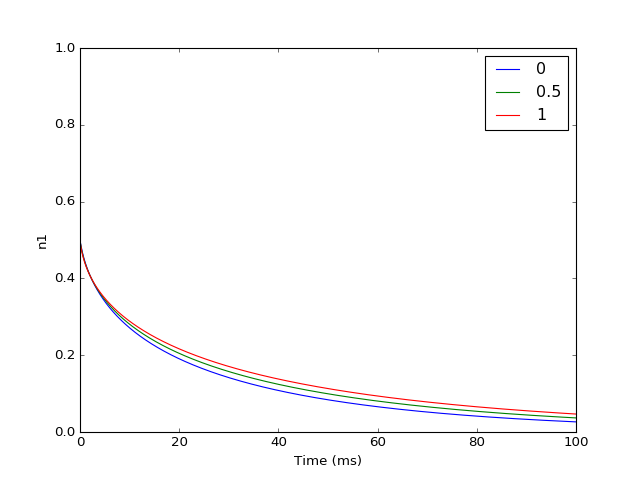

In [11]:
plt.figure()

for r in [0, 0.5, 1]:
    y0 = [n1_0]

    # solve the DEs
    soln = odeint(f, y0, t, args=(r, 10000))
    n1 = soln[:, 0]

    plt.plot(t, n1, label=str(r))

plt.axis([0, 100, 0, 1])
plt.xlabel('Time (ms)')
plt.ylabel('n1')
plt.legend(loc=0)

In [11]:
from matplotlib.widgets import Slider, Button, RadioButtons

In [12]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
plt.subplots_adjust(bottom=0.4)

# Initial conditions
n1_0 = 0.5           # Starting population excitation
r = 0.5
y0 = [n1_0]          # initial condition vector
t  = np.linspace(0, 100, 1000)   # time grid

# solve the DEs
soln = odeint(f, y0, t, args=(r,))
n1 = soln[:, 0]

l, = plt.plot(t, n1, label=str(r), lw=2, color='red')
plt.axis([0, 20, 0, 1])
plt.xlabel('Time (ms)')
plt.ylabel('n1')

axcolor = 'lightgoldenrodyellow'
axn1 = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axr = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)
axxd = plt.axes([0.25, 0.2, 0.65, 0.03], axisbg=axcolor)

sn1 = Slider(axn1, 'n1(0)', 0.1, 1.0, valinit=n1_0)
sr = Slider(axr, 'r', 0.1, 1.0, valinit=r)
sxd = Slider(axxd, r'd or $\rho$ multiplier', 0, 1000, valinit=100)

def update(val):
    n1_0 = sn1.val
    y0 = [n1_0]
    multiplier = sxd.val
    r = sr.val
    
    # solve the DEs
    soln = odeint(f, y0, t, args=(r, multiplier))
    n1 = soln[:, 0]
    
    # Optional: Normalise decay
#     n1 = n1/np.max(n1)
    l.set_ydata(n1)
    plt.draw()

sn1.on_changed(update)
sr.on_changed(update)
sxd.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sn1.reset()
    sr.reset()
    sxd.reset()
button.on_clicked(reset)

<IPython.core.display.Javascript object>

NameError: name 'Slider' is not defined

see: http://scipy.github.io/old-wiki/pages/Cookbook/Zombie_Apocalypse_ODEINT for coupled example.

# ODE Version

In [13]:
from scipy.integrate import ode

In [14]:
# solve the system dy/dt = f(t, y)
def f(t, y, args):
    n1 = y
    r, multiplier = args
    a = (1+r/2)*rho*d*multiplier
    dn1dt = - n1 / (tau*(1+a*n*sigma_12-a*n1*(sigma_12+sigma_21)))
    return [dn1dt]

<IPython.core.display.Javascript object>


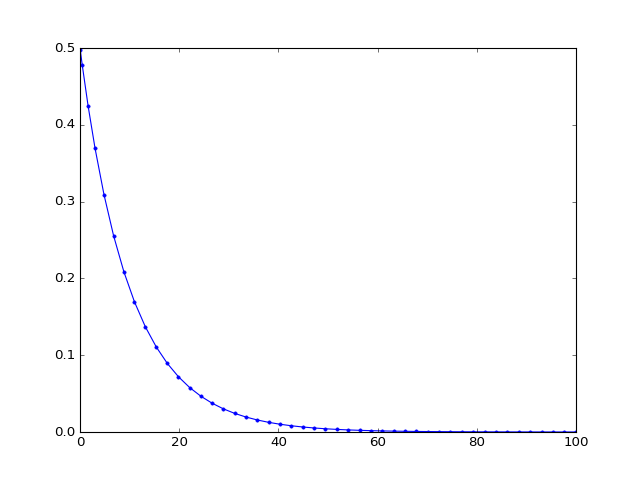

In [15]:
t0 = 0
multiplier = 100
r = 0.5
args = (r, multiplier)

solver = ode(f).set_integrator('dopri5')

sol = []
def solout(t, y):
    sol.append([t, *y])
solver.set_solout(solout)

solver.set_initial_value(y0, t0).set_f_params(args)
t1 = 100
solver.integrate(t1)
    
sol = np.array(sol)

plt.figure()
plt.plot(sol[:,0], sol[:,1], 'b.-')

http://stackoverflow.com/questions/12926393/using-adaptive-step-sizes-with-scipy-integrate-ode